# Proyecto Final - Data Science I: Fundamentos para la Ciencia de Datos
- **Alumno**: Matias Schinner 
- **Comisión**: 61690

## Desarrollo del proyecto:
En esta notebook, se explicará paso a paso el proceso que se está llevando a cabo. Se abordarán el contexto de los datos, las hipótesis formuladas y los posibles insights. El objetivo es facilitar la comprensión para aquellos que accedan y que no tengan conocimiento previo en ciencia de datos.

Este proyecto tiene como objetivo la clasificación de la calidad del vino basándose en sus características químicas. Utilizando un conjunto de datos de vinos tintos y blancos, se busca explorar la relación entre componentes como la acidez, el contenido de alcohol y otros factores con la calidad del vino. Para ello, se emplearán técnicas de análisis de datos, visualización y algoritmos de clasificación de machine learning.

El análisis se centrará en:
- Explorar las relaciones entre las diferentes variables químicas y su influencia en la calidad del vino.
- Clasificar los vinos en diferentes categorías de calidad (Malo, Regular, Bueno, Muy bueno) según su puntaje.
- Identificar las características que más afectan la calidad de los vinos.

Este proyecto servirá como práctica en la aplicación de modelos de machine learning para problemas de clasificación multiclase, haciendo uso de bibliotecas como `pandas`, `numpy`, `scikit-learn`, `matplotlib` y `seaborn`. Al final, se espera obtener un modelo que permita predecir la clasificación de calidad de los vinos a partir de sus componentes químicos, además de extraer insights sobre qué variables influyen más en la calidad del vino.


----------

## Dataset elegido:
El conjunto de datos utilizados provienen de dos archivos CSV: uno correspondiente a los vinos blancos y otro a los vinos tintos. Ambos datasets comparten las mismas columnas, que describen varias propiedades químicas del vino y un puntaje de calidad.

### Columnas del dataset:
- **fixed acidity**: Cantidad de ácidos fijos (en su mayoría tartárico y málico) presentes en el vino.
- **volatile acidity**: Cantidad de ácidos volátiles que pueden afectar el sabor del vino (exceso puede provocar sabores desagradables).
- **citric acid**: Un ácido que puede contribuir a la frescura y estabilidad del vino.
- **residual sugar**: Cantidad de azúcar que queda después de la fermentación (más azúcar puede hacer el vino más dulce).
- **chlorides**: Cantidad de sal presente en el vino (cloruros).
- **free sulfur dioxide**: Sulfuro no combinado que previene la oxidación y el crecimiento microbiano.
- **total sulfur dioxide**: Sulfuro total (combinado y libre) que protege el vino de la oxidación y microbios.
- **density**: Densidad del vino, que puede estar relacionada con el contenido de azúcar.
- **pH**: Mide la acidez o alcalinidad del vino.
- **sulphates**: Contribuyen a la estabilidad y frescura del vino, además de mejorar su sabor.
- **alcohol**: El contenido de alcohol del vino.
- **quality**: Puntaje de calidad del vino, con un rango de 1 a 10 (siendo 10 la mejor calidad).
- **color**: Se agregará una nueva columna para diferenciar entre vinos tintos (`red`) y vinos blancos (`white`).

[Fuente: Dataset - Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

----------
## Hipótesis planteadas:
1. Un mayor contenido de alcohol está asociado con una mayor calidad del vino.
2. La acidez volátil tiene un impacto negativo en la calidad del vino.
3. Los niveles de dióxido de azufre libre y total afectan de manera significativa la calidad del vino, ya que contribuyen a su preservación.
4. La densidad y los sulfatos están correlacionados positivamente con la calidad del vino.

----------
### Se importan las librerías con las que se trabajarán a lo largo del proyecto:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

----------
### Lectura del dataset
Se carga el dataset a partir de los dos archivos "*.csv*" (Uno de vino tinto y otro de vino blanco) y luego se los concatena para obtener un único dataset que contiene todos los registros y se los diferencia añadiendo una columna llamada "**color**" en la cual definirá si el registro es del vino tinto o del vino blanco.

In [3]:
# Carga de los datasets de vinos blancos y tintos
red_wine = pd.read_csv('winequality-red.csv', sep =';')
white_wine = pd.read_csv('winequality-white.csv', sep =';')

# Agregar la columna 'color' a cada dataset
red_wine['color'] = 'red'
white_wine['color'] = 'white'


#Unir ambos datasets en un solo dataframe
wine_data = pd.concat([white_wine, red_wine], ignore_index=True)

----------
### Analisis exploratorio de datos:

En el análisis exploratorio se realizará:

1. **Control de lectura correcta de los archivos**:  
   Verificación de que los datasets de vinos tintos y blancos se han cargado correctamente y de manera íntegra.

2. **Chequeo del tipo de datos**:  
   Validación de los tipos de datos en cada columna para asegurarse de que están correctos, tanto en las columnas numéricas y como en las categóricas.

3. **Cantidad de registros**:  
   Recuento del número de registros totales, así como la proporción de vinos tintos y blancos en el dataset final.

4. **Chequeo de datos faltantes**:  
   Identificación de valores nulos o faltantes en las columnas del dataframe. En esta etapa solo se detectarán los valores faltantes, para ser tratados en un paso posterior si es necesario.

5. **Estadísticas descriptivas**:  
   Resumen estadístico de cada variable, incluyendo métricas como la media, mediana, desviación estándar, mínimos y máximos. Esto permitirá tener una idea general de la distribución de los datos y detectar posibles anomalías.
   
6. **Visualización de distribuciones**:  
   Visualización inicial de la distribución de las variables más importantes (como alcohol, acidez y calidad) mediante gráficos como histogramas, boxplots o violines. Esto permitirá detectar posibles problemas en los datos y entender las variaciones entre vinos tintos y blancos.

7. **Detección de outliers**:  
   Análisis de la presencia de outliers mediante estadísticas descriptivas y visualización. Este paso permitirá identificar valores atípicos y decidir si es necesario tratarlos en una fase posterior de limpieza.

8. **Decisiones y desarrollo para limpieza de datos**:  
    A partir de los insights obtenidos en los pasos anteriores, se decidirá si es necesario tratar outliers, datos faltantes u otros problemas en los datos antes de pasar a la modelización.


------------------------------------------------------------------------
#### **1. Control de lectura correcta de los archivos:**

In [4]:
#Chequeo los primeros 5 datos del dataframe
wine_data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

A primera vista podemos decir que los registros iniciales se encuentran correctamente cargados. 
También podemos notar en la columna `color` que los primeros registros es de vino blanco, esto se debe a que en la concatenación se sumaron los datos del vino tinto a los datos del vino blanco, por lo que al final del dataset deberíamos encontrar registros de vino tinto.

In [5]:
#Comprobamos los ultimos 5 datos del dataframe
wine_data.tail(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality color  
6492     10.5        5   red  
6493     11.2        6   red  
6494     11.0        6   red  
6495     10.2        5   red  
6496     11.0        6   red

Podemos comprobar lo que concluimos sobre la concatenación de datos en el texto anterior.

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### **2. Chequeo del tipo de datos:**

In [6]:
#Información sobre los datos
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


-------------
Este resumen nos brinda información sobre:
- **El tipo de datos**: Tenemos **valores numéricos flotantes** para casi todas las columnas excepto por la columna `quality` que tiene **valores numéricos enteros** y la columna `color` que tiene el tipo **objeto** debido a que es un valor categórico.
- **Cantidad de columnas y registros**: Podemos ver que posee 13 columnas numeradas del 0 al 12 y una cantidad de índices (registros) de 6497 numerados del 0 al 6496. 
- **Conteo de valores no nulos**: El conteo de valores no nulos para todas las columnas es de 6497, es decir, que todos los registros en el dataset contienen valores.
- --------------------------------------------------------------

#### **3. Cantidad de registros:**

In [7]:
#Este codigo nos devuelve una tupla que contiene: (Cantidad de filas/registros/indices, cantidad de columnas)
wine_data.shape

(6497, 13)

(Filas, Columnas)

---------

#### **4. Chequeo de datos faltantes:**

In [8]:
wine_data.isnull().sum() #isnull Chequea todos los valores faltantes, tanto como NaN como valores vacios

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

-----------------------------------
Esta tabla nos muestra la cantidad de datos faltantes y valores vacíos, indicando que todas las columnas contienen 0 registros nulos o incompletos. Esto significa que no es necesario realizar tareas de reemplazo o eliminación de datos faltantes en este caso.

Sin embargo, a modo informativo, se detallan las posibles estrategias que podrían aplicarse en caso de que existieran valores nulos:

- _**Eliminar filas o columnas**_: Se pueden eliminar los registros o las columnas que contengan valores nulos, siempre y cuando no afecte negativamente al análisis. `dataframe.dropna(axis=0, inplace=True)` (axis= 1 para columnas, axis= 0 para registros)
- _**Rellenar con valores específicos**_: Reemplazar los valores faltantes por un número fijo, como un 0, o por un promedio, mediana u otro valor estadístico relevante. `dataframe.fillna(promedio, inplace=True)`
- _**Interpolación o métodos avanzados**_: Usar técnicas de interpolación entre los valores proximos a los faltantes. `dataframe.interpolate(limit_direction="both",inplace=True)` 
------------------------------------

#### **5. Estadísticas descriptivas:**

Para llevar un mejor análisis estadístico se dividirá el dataframe en los datos de vino tinto y vino blanco con la ayuda de creación de máscaras booleanas:

In [9]:
wine_red = wine_data[wine_data['color']=='red'] #Aplico la máscara al dataset wine_data y lo guardo bajo el nombre 'wine_red'

In [10]:
wine_red.describe().round(2) #Aquí filtro solamente los vinos tintos y hago una descripción estadística de sus columnas

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [11]:
wine_white = wine_data[wine_data['color']=='white'] #Aplico la máscara al dataset wine_data y lo guardo bajo el nombre 'wine_white'

In [12]:
wine_white.describe().round(2) #Aquí filtro solamente los vinos tintos y hago una descripción estadística de sus columnas

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    4898.00              4898.00               4898.00  4898.00  4898.00   
mean        0.05                35.31                138.36     0.99     3.19   
std         0.02                17.01                 42.50     0.00     0.15   
min         0.01                 2.00                  9.00     0.99     2.72   
25%         0.04                23.00                108.00     0.99     3.09   
50%         0.04                34.00                134.00     0.99     3.18   
75%         0.05                46.00                167.00     1.00     3.28   
max         0.35               289.00                440.00     1.04     3.82   

       sulphates  alcohol  quality  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     5.88  
std         0.11     1.23     0.89  
min         0.22     8.00     3.00  
25%         0.41     9.50     5.00  
50%         0.47    10.40     6.00  
75%         0.55    11.40     6.00  
max         1.08    14.20     9.00

En esta tabla se puede ver: la cantidad, la media, desviación estándar, el mínimo y máximo, cuartiles del 25%, 50% y 75% de cada columna. 
Esto nos otorga una visión sobre los valores, el rango de los mismos, dispersión y media de los datos que estamos trabajando.

A simple vista podemos ver que la cantidad de registros de vinos blancos (4898) es mayor que la de vinos tintos (1599). También se observa que en la mayoría de los promedios y la desviación estándar de los componentes químicos son diferentes entre el vino blanco y el vino tinto, lo que indica que las propiedades químicas varían significativamente entre ambos tipos de vino.

-----

#### **6. Visualización de distribuciones:**
#### **7. Detección de outliers:**  
Estos pasos se realizan en conjunto, ya que a partir de las gráficas se puede obtener información para cada objetivo.

##### **Gráfico de boxplot:**

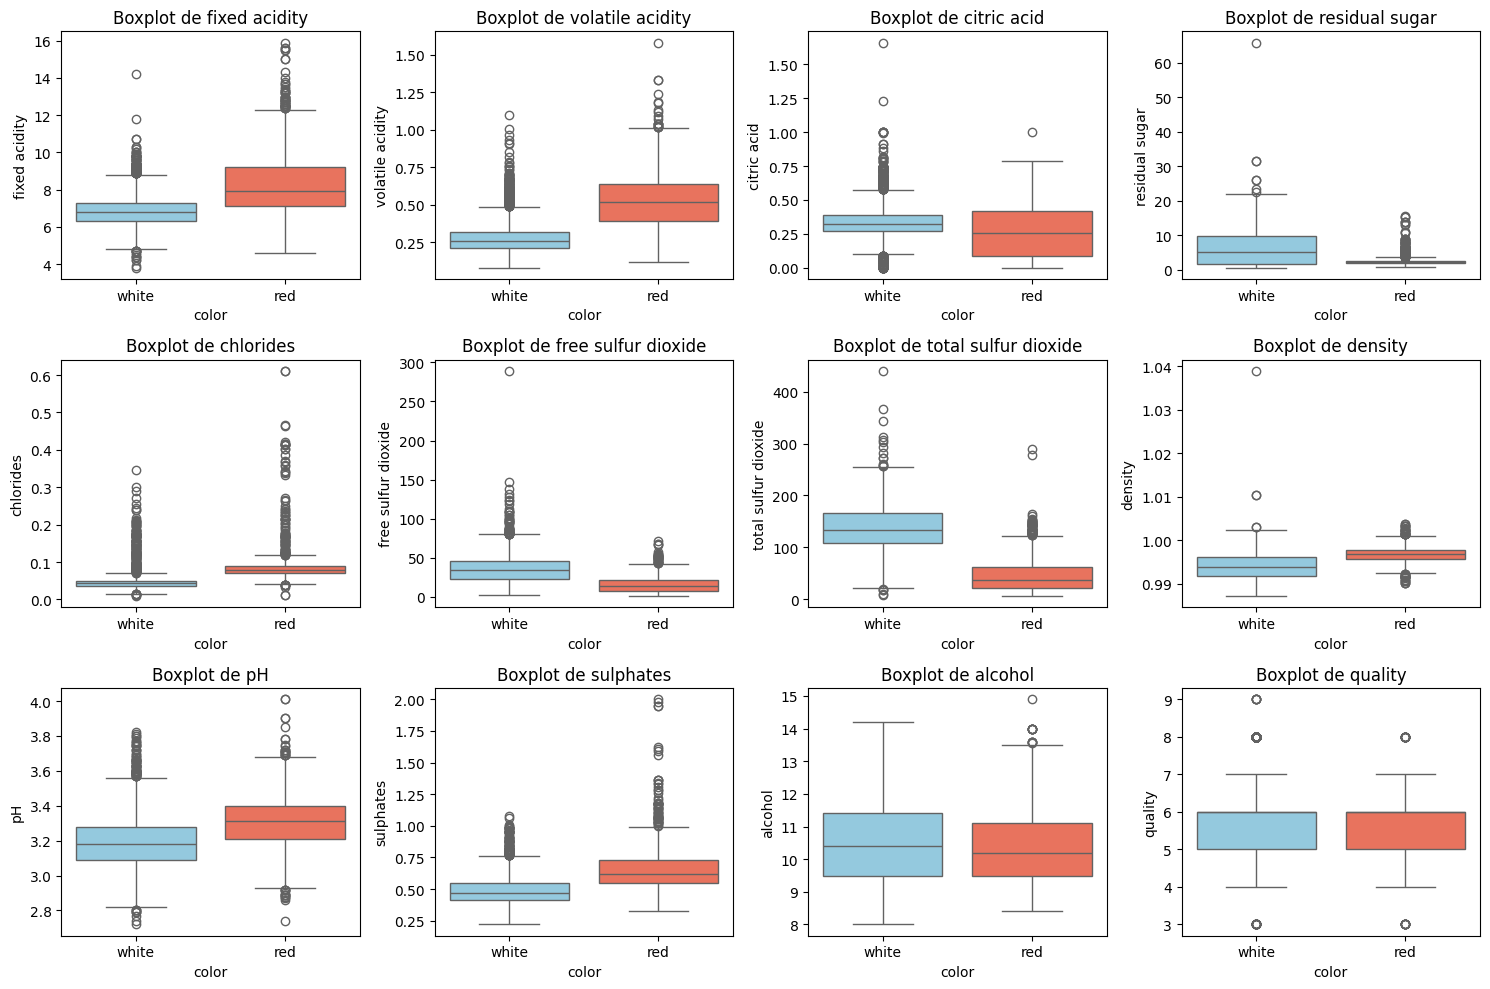

In [13]:
variables = [ 'fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

palette = {'red': 'tomato', 'white': 'skyblue'}

for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='color', y=var, data=wine_data, ax=ax, hue='color', palette=palette)
    ax.set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


Antes de pasar al análisis, se explicarán algunos términos lograr una mejor comprensión:

El **<u>rango intercuartílico (IQR)</u>** es una medida que nos ayuda a entender la dispersión de los datos en una serie de valores. Básicamente, el IQR nos indica el rango central en el que se encuentran la mayoría de los datos, eliminando los valores más extremos o atípicos.

Para calcularlo, dividimos los datos en cuatro partes iguales (cuartiles) después de ordenarlos de menor a mayor. El IQR se obtiene restando el valor en el primer cuartil (Q1), que es el punto que deja el 25% de los datos por debajo, del valor en el tercer cuartil (Q3), que deja el 75% de los datos por debajo. En otras palabras:  

**RANGO INTERCUARTÍLICO = Q3 - Q1**
Este rango representa el 50% de los datos centrales.  

**<u>¿Qué significa que haya valores fuera del IQR?</u>**
Cuando encontramos valores muy por encima o por debajo de este rango, es posible que estemos viendo valores atípicos o outliers. Estos son valores que se alejan mucho de la tendencia general de los datos y podrían indicar excepciones o mediciones inusuales. Por ejemplo, en un conjunto de datos de ingresos, un ingreso mucho mayor o menor que la mayoría sería un valor fuera del IQR.

Los valores fuera del rango intercuartílico no son necesariamente erróneos, pero es importante examinarlos ya que pueden tener un efecto significativo en ciertos análisis o modelos.

**En estos gráficos se analiza para cada vino "white" y "red" como se distribuyen los valores de cada variable de los componentes químicos.
Analizando los gráficos de 1 al 12, de izquierda a derecha:**
 1.  El vino blanco tiene valores más bajos para la cantidad de ácidos fijos que el vino tinto. Ambos tienen **valores fuera del rango intercuartílico**.
 2.  El vino blanco tiene valores más bajos para la cantidad de ácidos volátiles que el vino tinto. Ambos tienen **valores fuera del rango intercuartílico**, pero el vino tinto posee más cantidad.
 3.  El vino tinto tiene valores más bajos para la cantidad de azúcares residuales que el vino tinto. Ambos tienen **valores fuera del rango intercuartílico**, si bien el vino blanco poseé más valores fuera del rango, el vino tinto tiene valores mucho más lejanos y podría tratarse de **outliers**.
 4.  El vino tinto tiene valores más altos para la cantidad de cloruros que el vino blanco. Ambos poseen **muchos valores fuera del rango intercuartílico**, pero el vino tinto tiene valores más alejados.
 5.  El vino tinto tiene valores más altos para el pH que el vino blanco. Ambos poseen **muchos valores fuera del rango intercuartílico** tanto en la parte inferior como en la superior.
 6.  En este caso los valores del porcentaje alcohol son semejantes para ambos vinos. El **vino tinto tiene valores fuera del rango intercuartílico**.
 7.  El vino tinto tiene valores más altos de sulfatos que el vino blanco. Ambos poseen **muchos valores fuera del rango intercuartílico** tanto en la parte inferior como en la superior.
 8.  El vino tinto tiene valores más altos de densidad que el vino blanco y se encuentran más concentrados. Ambos **poseen valores fuera del rango intercuartílico**, el vino tinto poseé muchos valores fuera del rango intercuartílico, pero el vino blanco posee valores muy alejados pudiéndose tratar de **outliers**.
 9.  Tanto el vino tinto como el vino blanco poseen valores similares para el ácido cítrico, pero los del vino tinto se encuentran más dispersos. Ambos poseen valores fuera del rango intercuartílico. El vino tinto poseé **solo un valor fuera del rango** y el vino blanco **posee muchos valores fuera del rango** y algunos muy alejados pudiéndose tratar de **outliers**.
 10.  El vino tinto tiene valores más bajos de dióxido de azufre libre que el vino blanco. Ambos poseen **muchos valores fuera del rango intercuartílico**, el vino blanco posee un valor muy alejado pudiéndose tratar de un **outlier**.
 11.  El vino tinto tiene valores más bajos de dióxido de azufre total que el vino blanco. Ambos poseen **muchos valores fuera del rango intercuartílico**, y tienen valores muy alejados pudiéndose tratarse de **outliers**.
 12.  Tanto el vino tinto como el vino blanco poseen valores similares para la calidad según el color. El vino blanco **tiene 3 valores fuera del rango intercuartílico** y el vino tinto **solo dos**.


##### **Gráfico de Histogramas:**

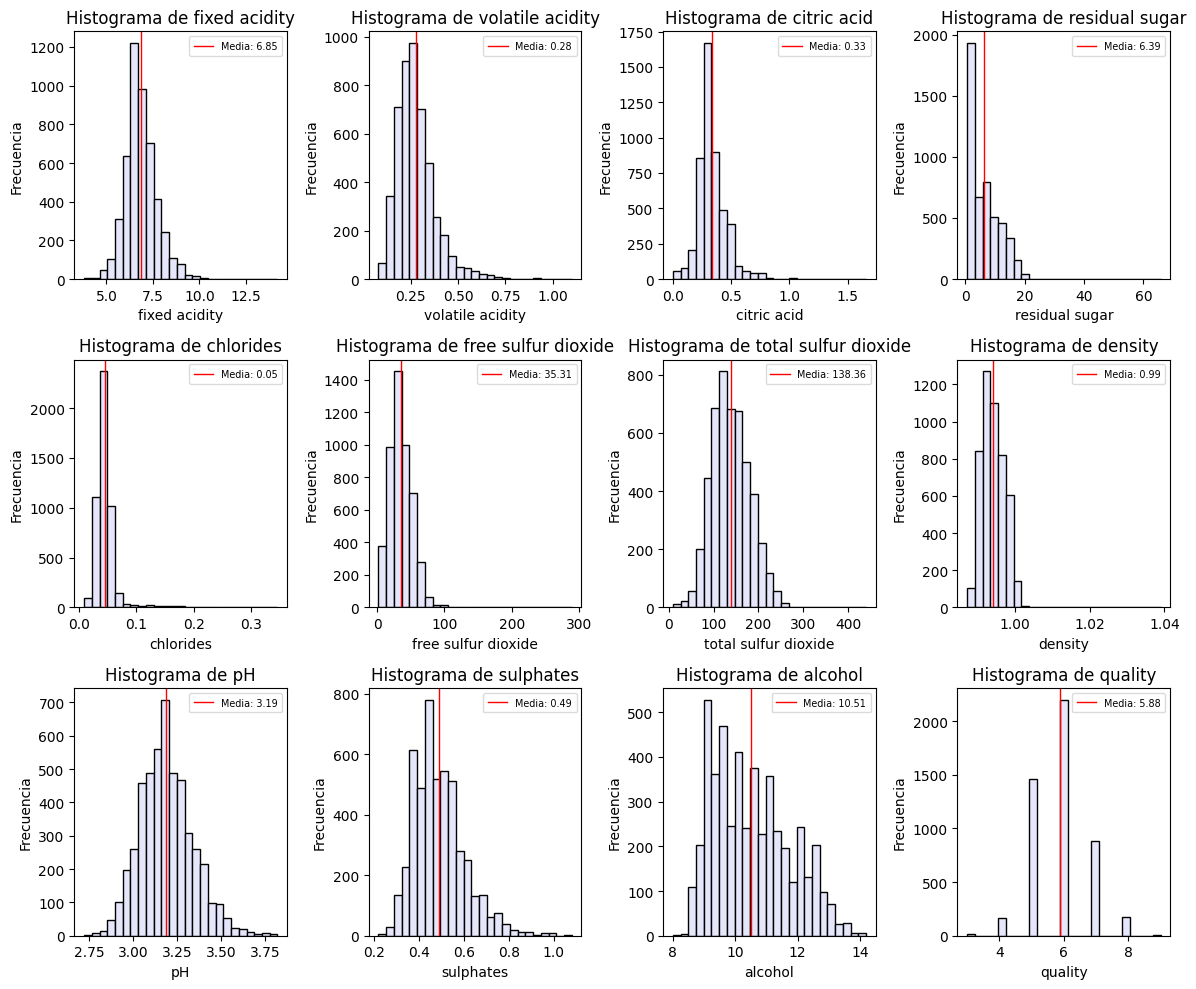

In [14]:
variables = [ 'fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.hist(wine_white[var], bins=25, color='lavender', edgecolor='black')
    
    mean = wine_white[var].mean()

    ax.axvline(mean, color='red', linestyle='-', linewidth=1, label=f'Media: {mean:.2f}')
    
    ax.set_title(f'Histograma de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.legend(loc='upper right', fontsize='x-small', framealpha=0.7, borderpad=0.5)


# Ajustamos el layout
plt.tight_layout()
plt.show()


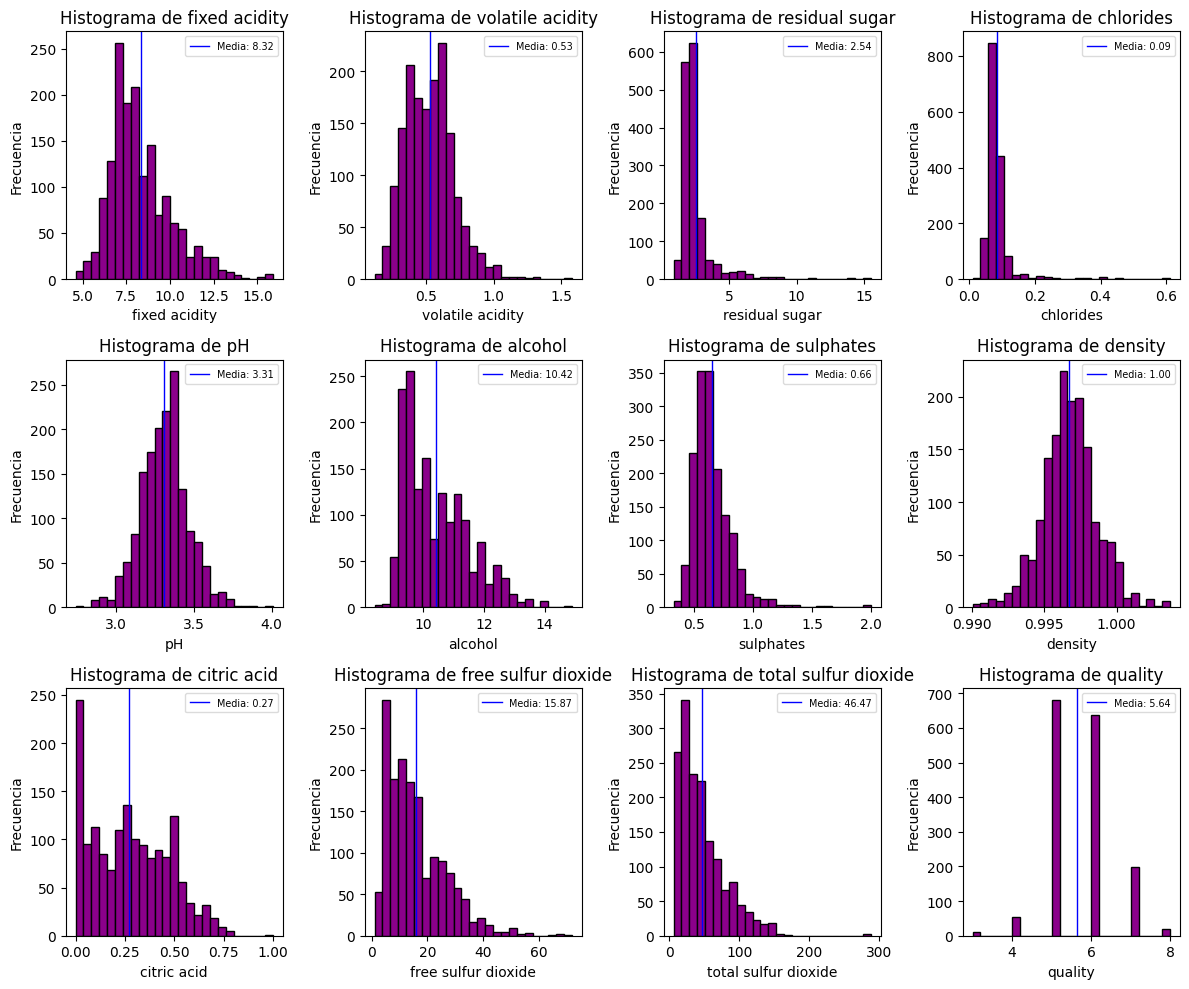

In [15]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.hist(wine_red[var], bins=25, color='darkmagenta', edgecolor='black')
    
    mean = wine_red[var].mean()

    ax.axvline(mean, color='blue', linestyle='-', linewidth=1, label=f'Media: {mean:.2f}')
    
    ax.set_title(f'Histograma de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.legend(loc='upper right', fontsize='x-small', framealpha=0.7, borderpad=0.5)


# Ajustamos el layout
plt.tight_layout()
plt.show()

En estos últimos dos gráficos podemos ver la distribución de la frecuencia de los valores para cada variable.
En el primer grupo de gráficos es para el caso del vino blanco, obteniendo su media para las distintas variables y su respectiva distribución, y lo mismo para el segundo grupo de gráficos que es para el vino tinto.
A simple vista podemos ver que hay diferencia en distribuciones para distintas variables entre los vinos, entre ellas:

| Variable      | Media para el Vino Blanco | Media para el Vino Tinto |
|---------------|---------------------------|--------------------------|
|Ácidos fijos   |6,85                       |8,32                      |
|Ácidos volatiles|0,28 |0,53|
|Azúcar residual | 6,39|  2,54|  
|Cloruros | 0,05| 0,09|
| pH| 3,31 | 3,19      |
| Alcohol| 10,51| 10,42 |
| Sulfatos|0,49| 0,66|
| Densidad| 0,99| 1   |
| Ácido cítrico| 0,33| 0,27 |
| Dióxido de azufre libre| 35,31|15,87 |
| Ácidos volátiles| 138,36| 46,47|
| Calidad| 5,88|5,64|


##### **Gráfico Scatter:**

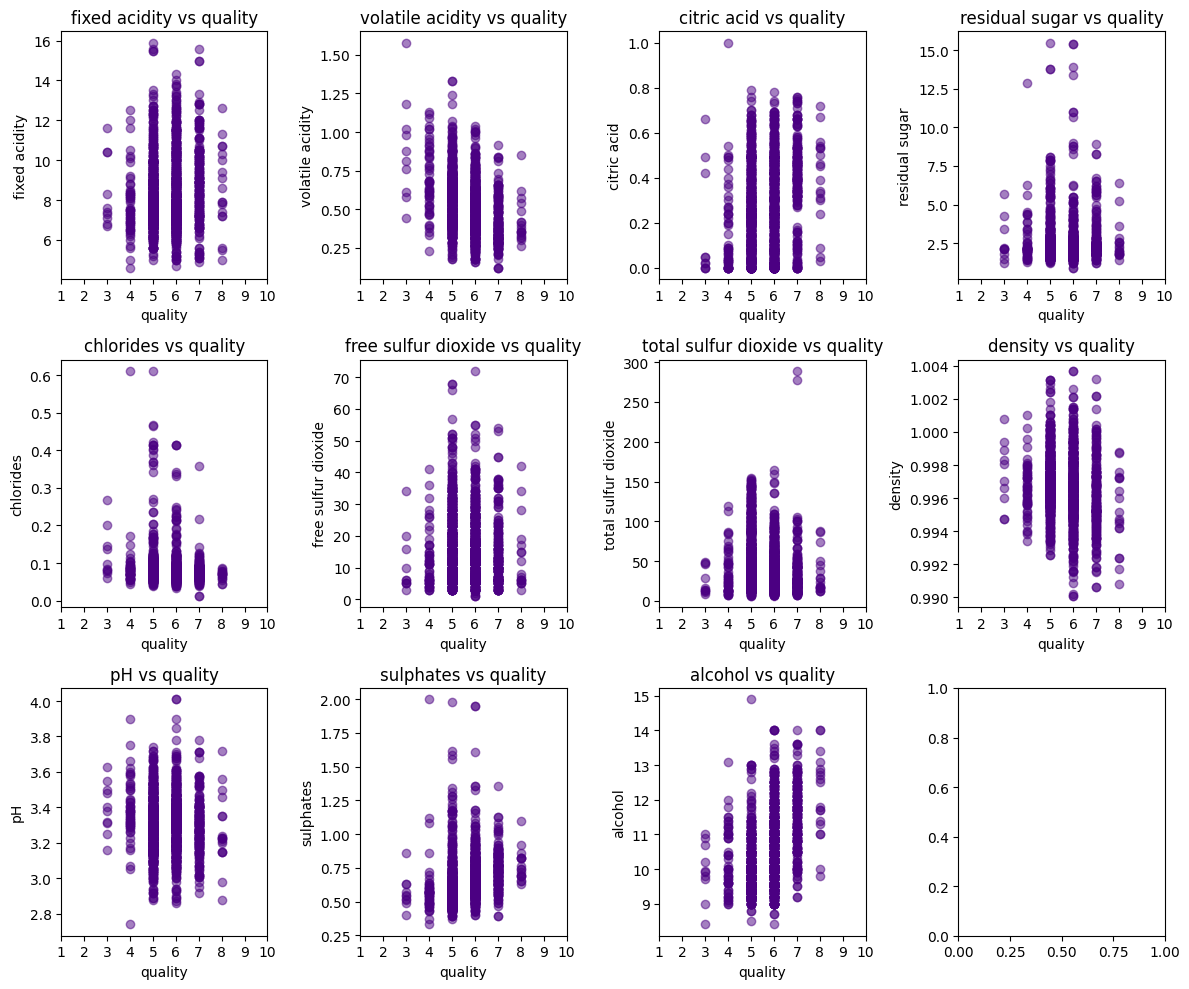

In [16]:
variables = [ 'fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.scatter(wine_red[['quality']], wine_red[[var]], alpha=0.5, color='indigo')
    ax.set_title(f'{var} vs quality')
    ax.set_xlabel('quality')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()


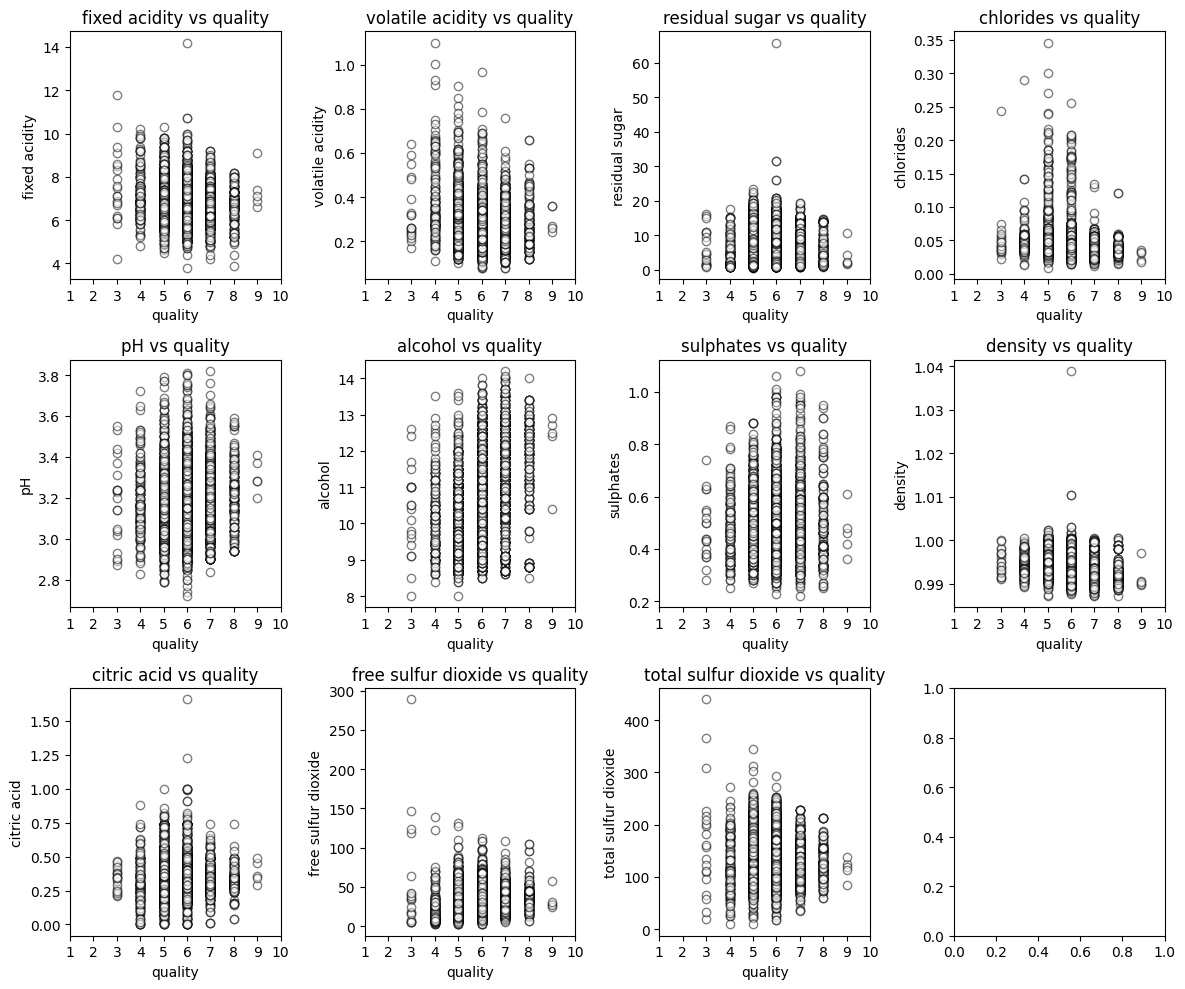

In [17]:
variables = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'pH', 'alcohol', 'sulphates', 'density', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide']

fig, axes = plt.subplots(3, 4, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    ax.scatter(wine_white[['quality']], wine_white[[var]], alpha=0.5, facecolors='white', edgecolors='black')
    ax.set_title(f'{var} vs quality')
    ax.set_xlabel('quality')
    ax.set_ylabel(var)
    ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.show()


En estos gráficos ya podemos notar que hay cierta correlación entre los parámetros y el puntaje de calidad, en algunos hay tendencias lineales y en otros hay una distribución del tipo campana de Gauss.
Para verlo mejor haremos una matriz de correlación para ver los valores de correlación que tienen entre cada uno de los parámetros.


##### **Matriz de correlación:**

**Interpretación del Coeficiente de Correlación**
- 0 a 0.2: Sin correlación o correlación muy débil.
- 0.2 a 0.3: Correlación débil.
- 0.3 a 0.5: Correlación moderada.
- 0.5 a 0.7: Correlación fuerte.
- 0.7 a 1.0: Correlación muy fuerte.

**Interpretación del signo de la correlación:**
- <u>Correlación negativa</u>: Un valor negativo indica que a medida que una variable aumenta, la otra tiende a disminuir. 
- <u>Correlación positiva</u>: Un valor positivo indica que ambas variables tienden a aumentar o disminuir juntas.

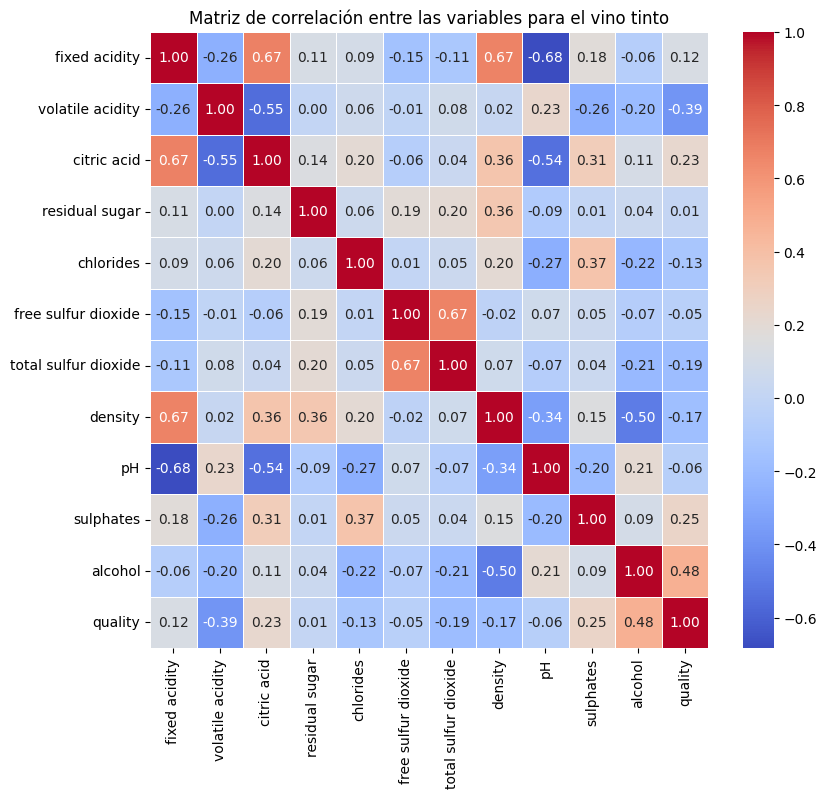

In [18]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_red.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de correlación entre las variables para el vino tinto')
plt.show()


**Aquellos que tienen una correlación con el puntaje de calidad son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Ácidez volátil| -0.39 | Correlación negativa moderada |
| Ácido cítrico| 0.23| Correlación positiva débil|
| Sulfatos| 0.25|Correlación positiva débil|
| Alcohol| 0.48|Correlación positiva moderada/fuerte|


**Aquí tenemos las variables que <u>más influencia tienen sobre el valor de la calidad del vino tinto</u>.**


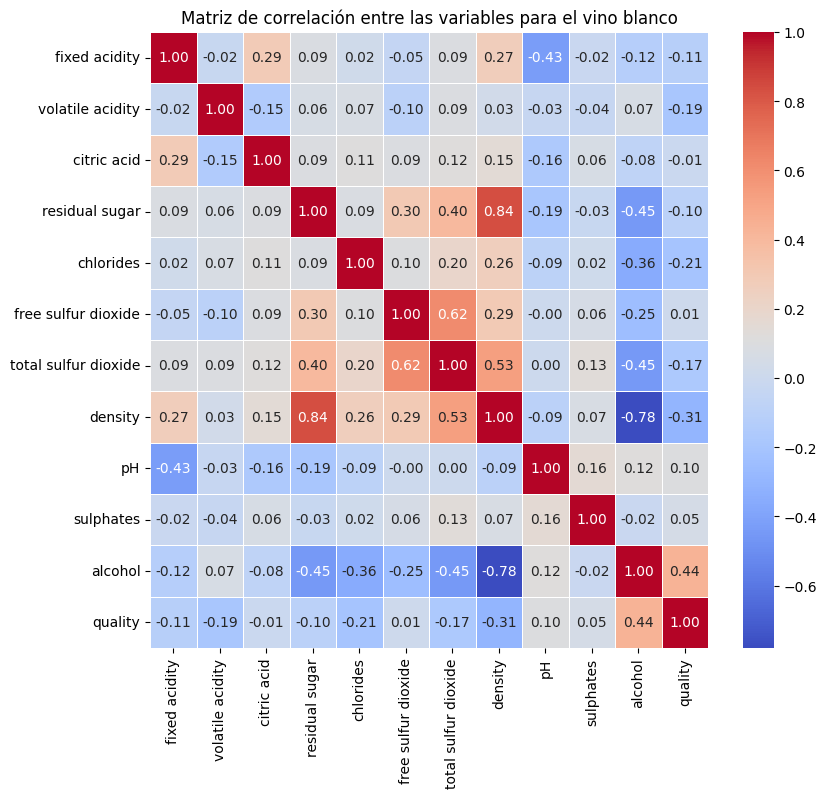

In [19]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_white.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de correlación entre las variables para el vino blanco')
plt.show()

**Aquellos que tienen una correlación con el puntaje de calidad son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Acidez volátil| -0.19 | Correlación negativa débil |
| Cloruros| -0.21| Correlación negativa débil|
| Densidad| -0.31|Correlación negativa moderada|
| Alcohol| 0.44|Correlación positiva moderada/fuerte|

**Aquí tenemos las variables que <u>más influencia tienen sobre el valor de la calidad del vino blanco</u>.**

##### **Gráfico de violin para los tipos de vino**:

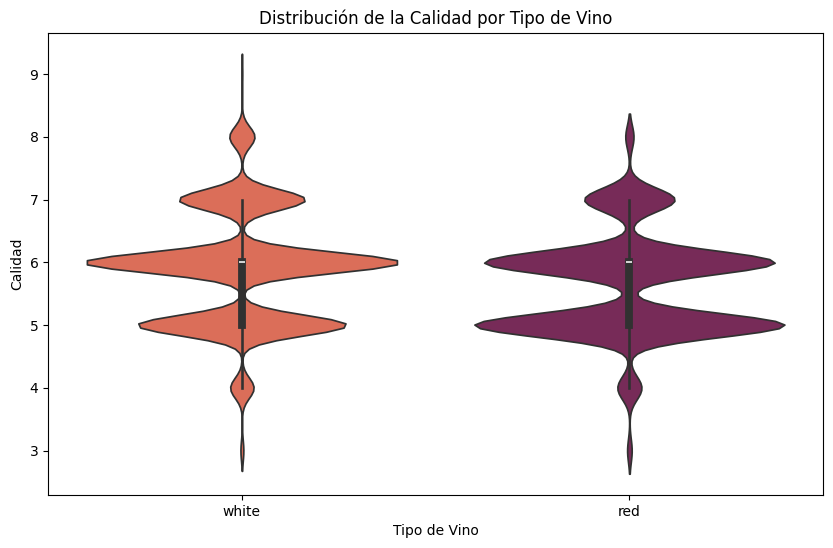

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='color', y='quality', data=wine_data, hue='color', palette='rocket_r', legend=False)
plt.title('Distribución de la Calidad por Tipo de Vino')
plt.xlabel('Tipo de Vino')
plt.ylabel('Calidad')
plt.show()


Este gráfico muestra la distribución de la calidad del vino (calificación de 1 a 10) para los vinos tintos y blancos. Cada "violín" representa la densidad de probabilidad de la calidad de los vinos en función de su tipo (tinto o blanco).
Se puede observar que:
- El vino blanco posee más cantidad de valores en el puntaje de calidad 6, seguido por el puntaje 5 y posterior el puntaje 7.
- El vino tinto posee más cantidad de valores en el puntaje de calidad 5, seguido por el puntaje 6 y posterior el puntaje 7.
En la gráfica se puede ver como una distribución de "Campana de Gauss" donde para cada vino la mayor cantidad de valores para un puntaje indica el valor central de la campana.

##### **Gráfico de pairplot:**

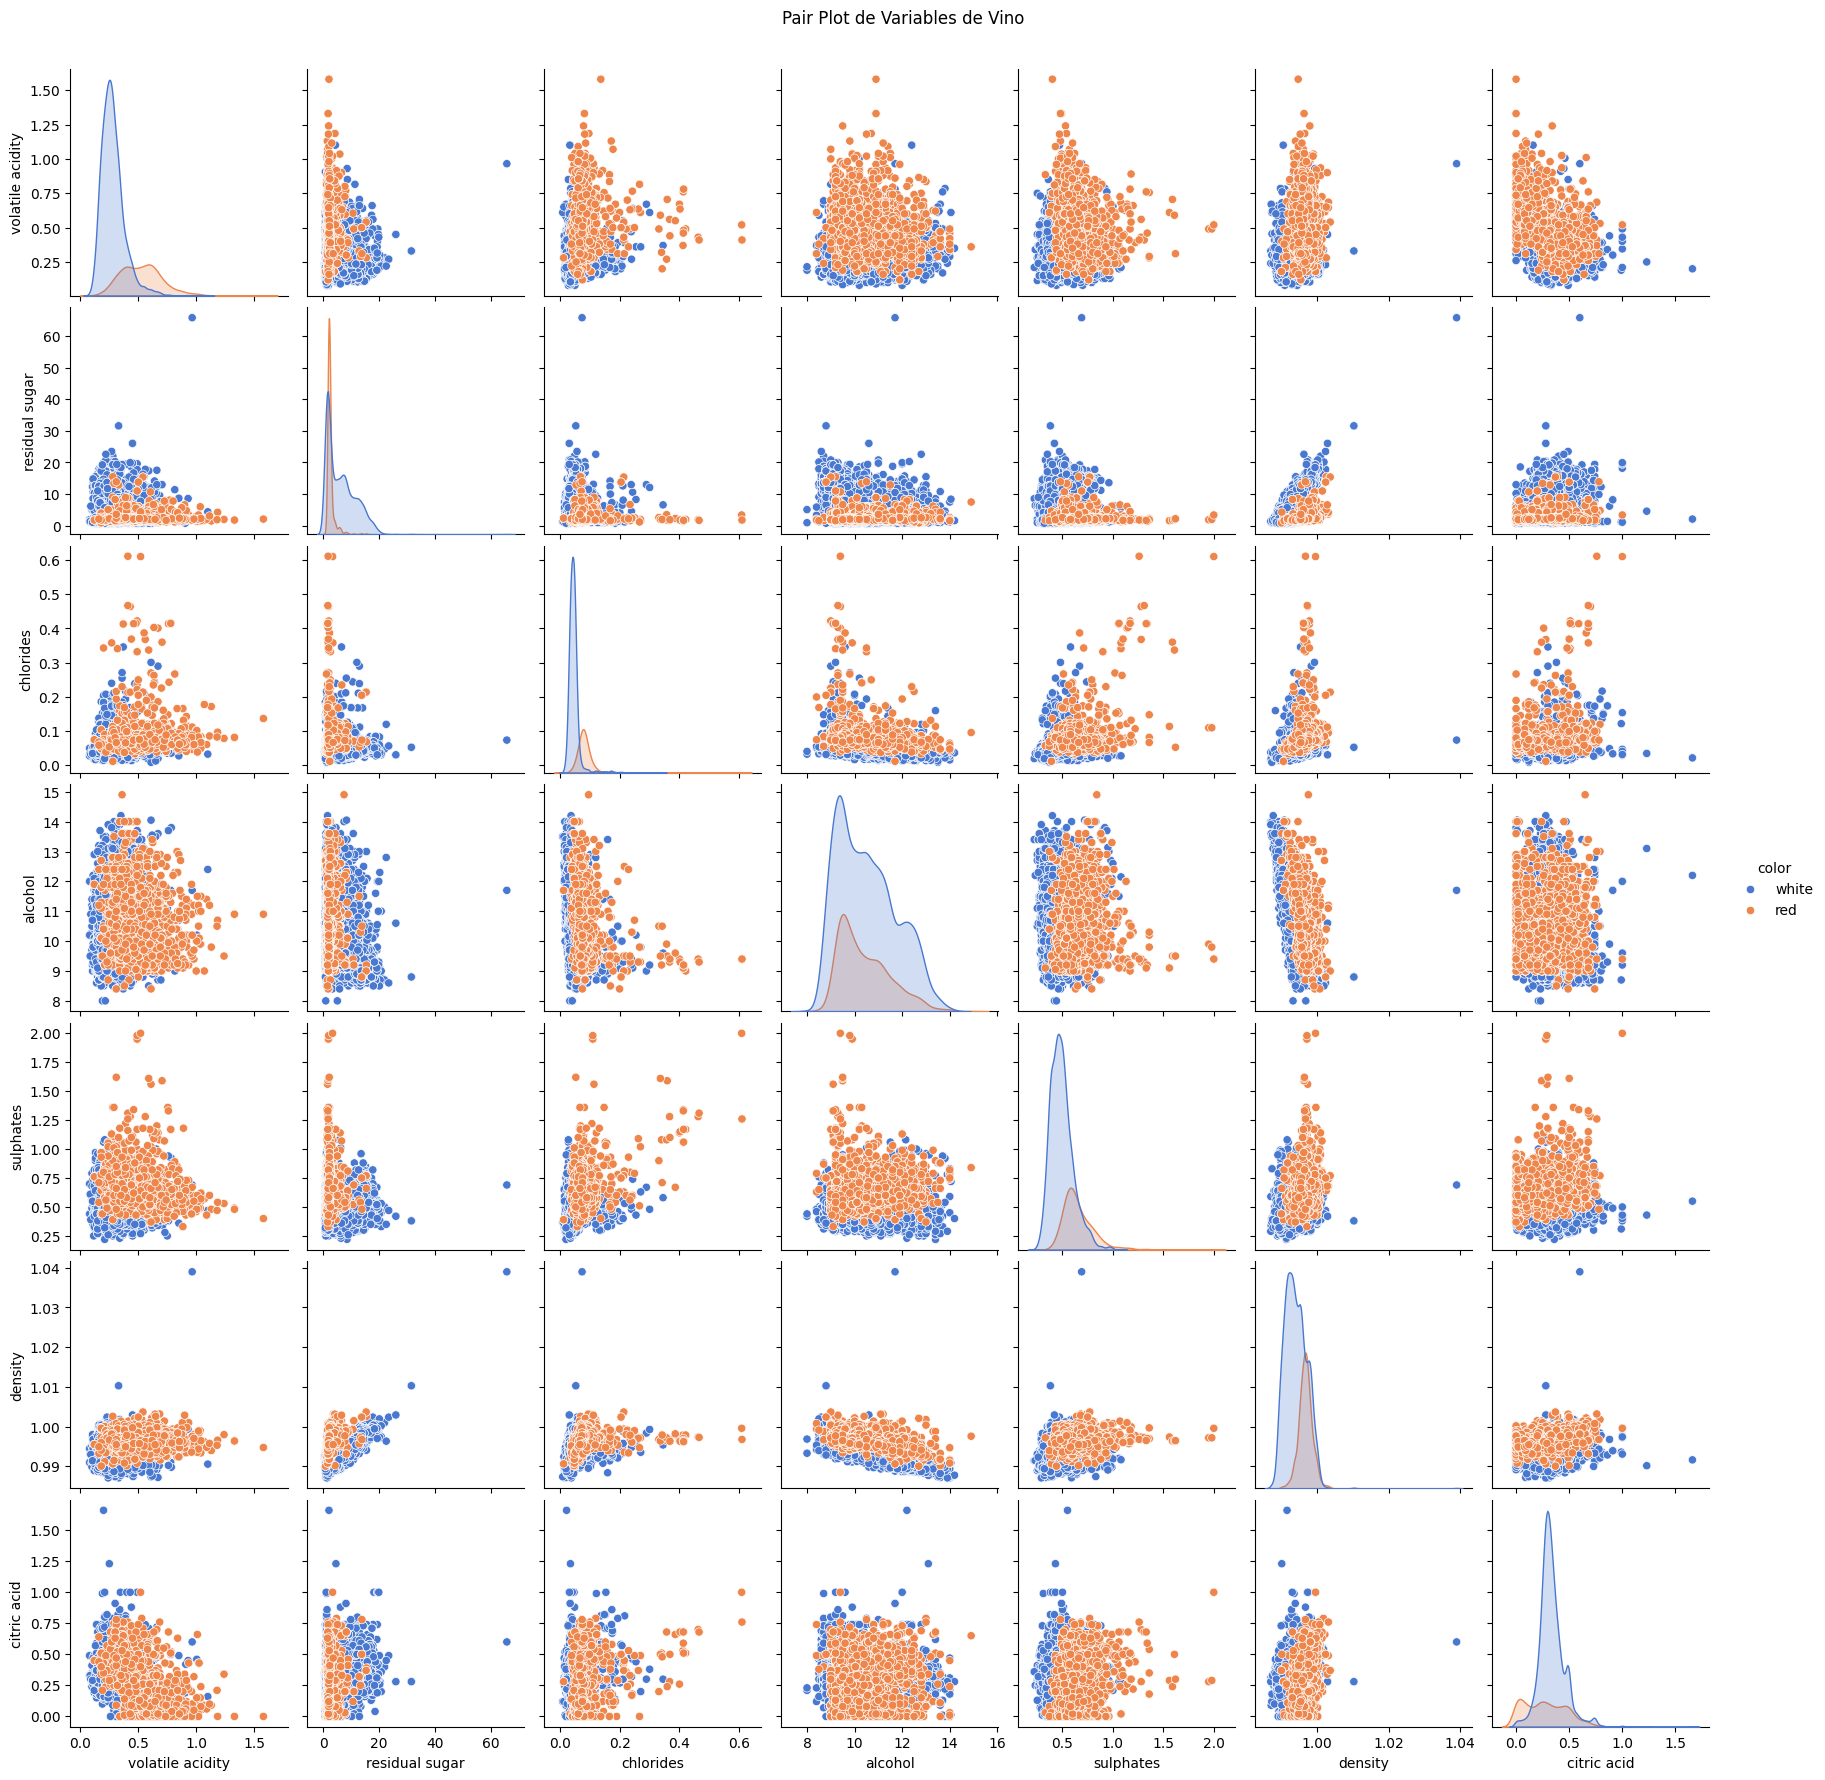

In [21]:
variables = ['volatile acidity', 'residual sugar', 'chlorides', 'alcohol', 'sulphates', 'density', 'citric acid', 'color']

sns.pairplot(wine_data[variables], hue='color', palette='muted', diag_kind='kde')
plt.suptitle('Pair Plot de Variables de Vino', y=1.02)
plt.show()

El pair plot es una visualización que muestra las relaciones entre múltiples variables en el conjunto de datos, en este caso, las características químicas del vino (como acidez, pH, y alcohol) y la calidad, diferenciando entre vinos tintos y blancos. También nos da una idea de como es la dispersión de los datos para cada variable.

------------------------------------------

#### 8. Decisiones y desarrollo para limpieza de datos:
Se pudo comprobar en la sección anterior que un valor de un componente químico para el vino tinto puede ser un outlier para un vino blanco y viceversa. Esto lleva a que se analice la eliminación de los outliers por separado cada vino, tinto y blanco.
Primero se procede a analizar el porcentaje de datos fuera de los boxplots para decidir si es correcto eliminar los datos (Es decir, si el valor de la cantidad de datos eliminados es bajo) o si se debe eliminar datos específicos que pueden estar desviando mucho la media como lo es para el caso en el boxplot del vino blanco para "free sulfur dioxide".

In [22]:
def conteo_outliers(df):
    outlier_conteo = {}
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for var in num_cols:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        LimInf = Q1 - 1.5 * IQR
        LimSup = Q3 + 1.5 * IQR
        
        # Conteo de outliers
        outlier_count = df[(df[var] < LimInf) | (df[var] > LimSup)].shape[0]
        outlier_conteo[var] = outlier_count  # Guardamos el conteo de outliers
    
    return outlier_conteo

# Total de datos
total_red = wine_red.shape[0]
total_white = wine_white.shape[0]

# Contar outliers
outliers_red = conteo_outliers(wine_red)
outliers_white = conteo_outliers(wine_white)

outliers_red_pct = {var: str(round((count / total_red)* 100,1)) for var, count in outliers_red.items()}
outliers_white_pct = {var: str(round((count / total_white)* 100, 1)) for var, count in outliers_white.items()}

outliers_red_df = pd.DataFrame.from_dict(outliers_red_pct, orient='index', columns=['% Outliers Tinto'])
outliers_white_df = pd.DataFrame.from_dict(outliers_white_pct, orient='index', columns=['% Outliers Blanco'])

comparacion_horizontal = pd.concat([outliers_red_df, outliers_white_df], axis=1)
comparacion_horizontal_styled = comparacion_horizontal.style.set_caption("Comparación de % de Outliers por Tipo de Vino")

comparacion_horizontal_styled

Aquí se puede ver en la tabla para cada tipo de vino la cantidad de outliers que tiene cada columna en función de la cantidad total de datos.

Podemos ver que si nos basamos en considerar un outlier como un valor fuera del rango: **[Cuartil 1 - 1.5 * Rango Intercuartílico ; Cuartil 3 + 1.5 * Rango Intercuartílico]** y lo eliminamos, estaríamos **perdiendo mucho porcentaje de datos, equivalente a decir que se pierde mucha información y consecuentemente afectaría al modelo.**

En este caso, optaremos por **eliminar aquellos puntos que se encuentran muy alejados.**

In [23]:
#Eliminación de outliers por limites
limites_tinto = {
    'fixed acidity': (4, 15),  
    'volatile acidity': (0.15, 1.35),
    'chlorides': (0, 0.5),
    'total sulfur dioxide': (0, 200),
    'sulphates': (0, 1.75),
    'alcohol': (0, 14.5),
}

limites_blanco = {
    'fixed acidity': (0, 12),  
    'citric acid': (0, 1.12),
    'chlorides': (0, 0.5),
    'residual sugar': (0, 40),
    'free sulfur dioxide': (0, 200),
    'total sulfur dioxide': (0, 400),
    'density': (0, 1.02),
}


wine_clean_red = wine_red.copy()
for var, (min_val, max_val) in limites_tinto.items():
    wine_clean_red = wine_clean_red[(wine_clean_red[var] >= min_val) & (wine_clean_red[var] <= max_val)]


wine_clean_white = wine_white.copy()
for var, (min_val, max_val) in limites_blanco.items():
    wine_clean_white = wine_clean_white[(wine_clean_white[var] >= min_val) & (wine_clean_white[var] <= max_val)]



In [24]:
wine_clean_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1583.000000       1583.000000  1583.000000     1583.000000   
mean        8.295768          0.528152     0.268534        2.527258   
std         1.700272          0.176734     0.192837        1.393411   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.000000          1.330000     0.790000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1583.000000          1583.000000           1583.000000  1583.000000   
mean      0.086775            15.866709             46.090335     0.996735   
std       0.043433            10.459825             31.671708     0.001862   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996740   
75%       0.090000            21.000000             62.000000     0.997830   
max       0.467000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1583.000000  1583.000000  1583.000000  1583.000000  
mean      3.313607     0.654327    10.415256     5.635502  
std       0.151496     0.155896     1.059483     0.802448  
min       2.860000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     1.620000    14.000000     8.000000

In [25]:
wine_clean_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.852984          0.278128     0.333669        6.382311   
std         0.837458          0.100359     0.118812        5.001788   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        11.800000          1.100000     1.000000       31.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045775            35.259350            138.264357     0.994020   
std       0.021852            16.618534             42.238380     0.002922   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991730   
50%       0.043000            34.000000            134.000000     0.993750   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           146.500000            366.500000     1.010300   

                pH    sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  4893.000000  
mean      3.188199     0.489765    10.513035     5.878398  
std       0.150986     0.114119     1.230312     0.885128  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

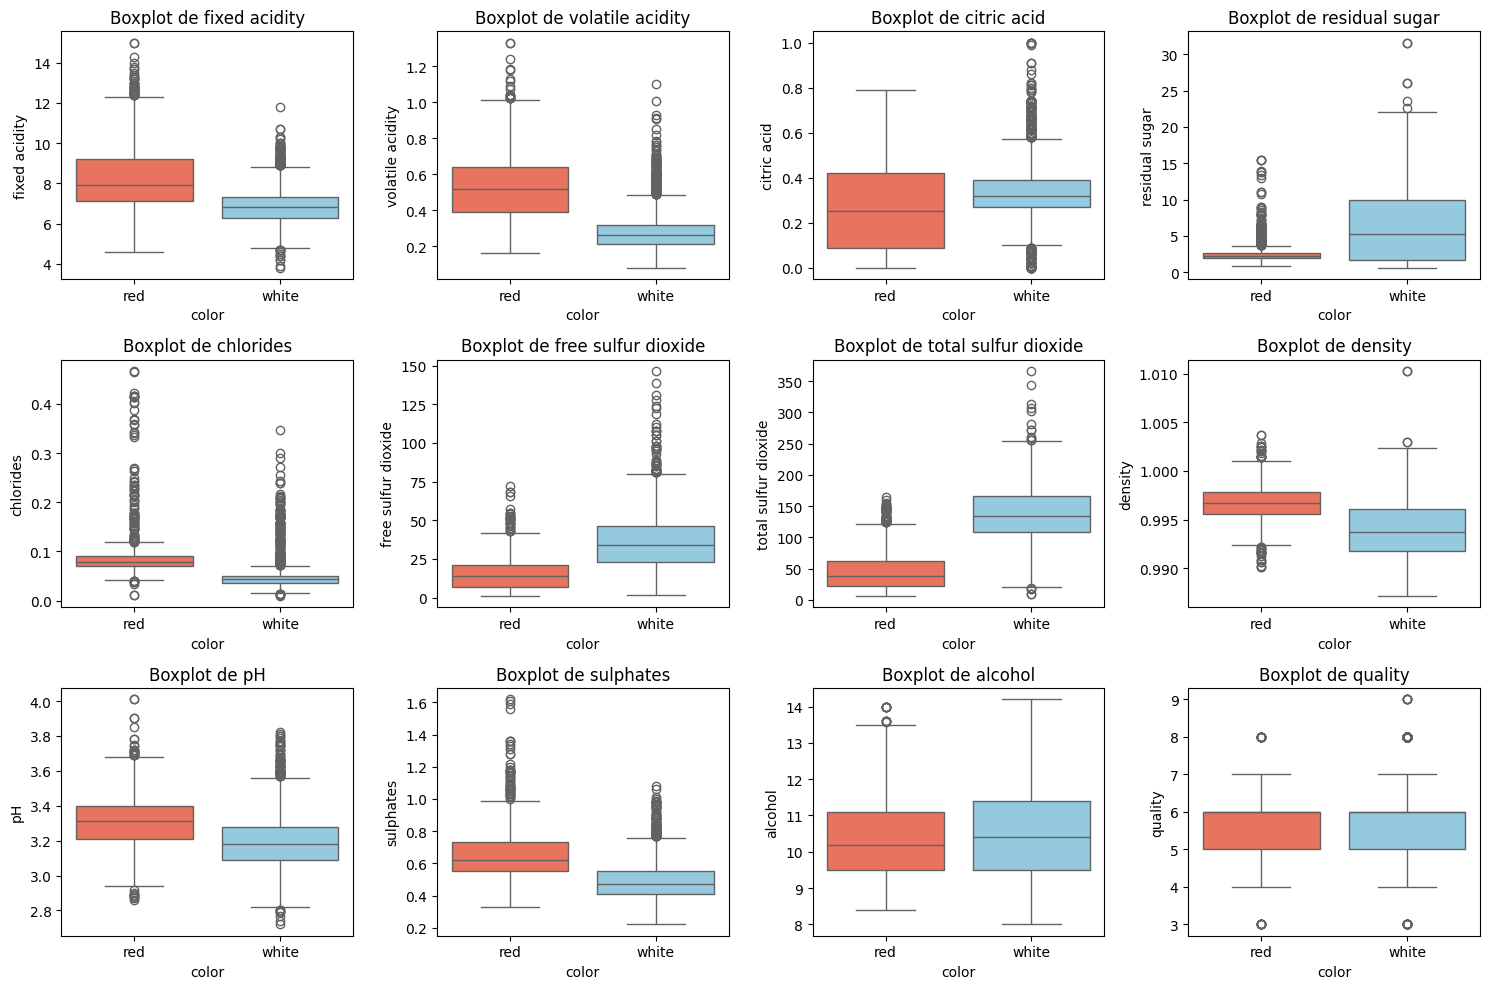

In [26]:
variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'density', 'pH', 
    'sulphates', 'alcohol', 'quality'
]

wine_clean_red['color'] = 'red'
wine_clean_white['color'] = 'white'

wine_combined = pd.concat([wine_clean_red, wine_clean_white], ignore_index=True)

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

palette = {'red': 'tomato', 'white': 'skyblue'}

for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='color', y=var, data=wine_combined, ax=ax, hue='color', palette=palette, legend=False)
    ax.set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

En estos nuevos boxplots de se puede comparar la eliminación de aquellos valores extremos que estaban muy desviados de la media.

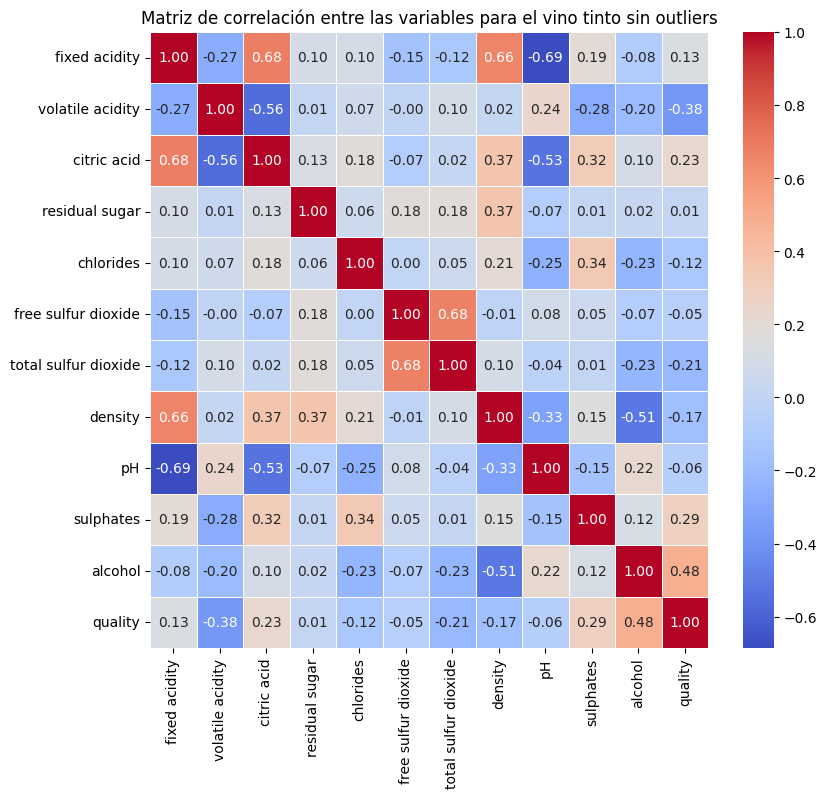

In [27]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_clean_red.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de correlación entre las variables para el vino tinto sin outliers')
plt.show()

**Comparando los valores de correlación sin outliers con los que si tienen outliers:**

| Variables     | Correlación     | Tipo de correlación     | Comparación con los datos originales |
|---------------|---------------|---------------|---------------  |
| Acidez volátil| -0.38 | Correlación negativa moderada | Disminuyó|
| Ácido cítrico| 0.23| Correlación positiva débil| Disminuyó|
| Sulfatos| 0.29|Correlación positiva moderada| Aumentó|
| Alcohol| 0.48|Correlación positiva fuerte| Se mantuvo|



**Aquí tenemos las variables que <u>más influencia tienen sobre el valor de la calidad del vino tinto sin outliers</u>.**

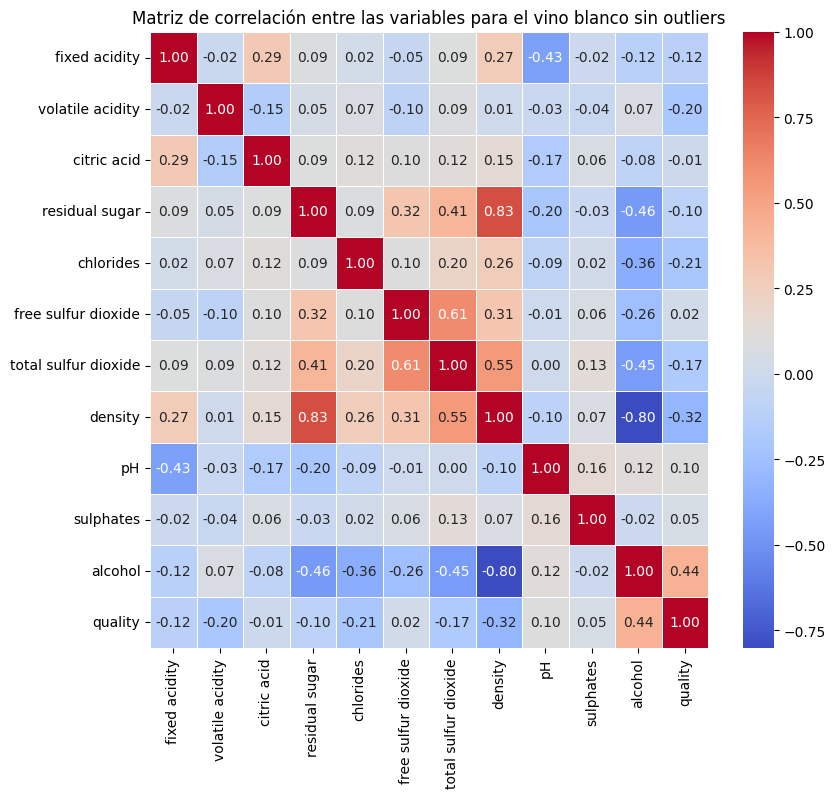

In [28]:
plt.figure(figsize=(9,8))
sns.heatmap(wine_clean_white.iloc[:,:12].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de correlación entre las variables para el vino blanco sin outliers')
plt.show()

**Comparando los valores de correlación sin outliers con los que si tienen outliers:**

| Variables     | Correlación     | Tipo de correlación     | Comparación con los datos originales | 
|---------------|---------------|---------------|---------------  |
| Acidez volátil| -0.20 | Correlación negativa débil | Aumentó|
| Cloruros| -0.21| Correlación negativa débil| Se mantuvo|
| Densidad| -0.32|Correlación negativa moderada| Aumentó|
| Alcohol| 0.44|Correlación positiva moderada/fuerte| Se mantuvo|

**Aquí tenemos las variables que <u>más influencia tienen sobre el valor de la calidad del vino blanco sin outliers</u>.**

----------------------

### Conclusiones EDA

Recordando las hipótesis: 
1) Un mayor contenido de alcohol está asociado con una mayor calidad del vino.
2) La acidez volátil tiene un impacto negativo en la calidad del vino.
3) Los niveles de dióxido de azufre libre y total afectan de manera significativa la calidad del vino, ya que contribuyen a su preservación.
4) La densidad y los sulfatos están correlacionados positivamente con la calidad del vino.


_**Conclusión**_:  
Después de realizar el Análisis Exploratorio de Datos (EDA), encontramos que varias propiedades químicas del vino muestran una relación con la variable de calidad, lo cual respalda parcialmente nuestras hipótesis iniciales. A continuación, se discute cada hipótesis en función de los hallazgos:

- La primera hipótesis se cumple, ya que analizando las correlaciones obtenidas, podemos comprobar que, tanto para el vino tinto y el vino blanco, el contenido de alcohol tiene una correlación positiva con la calidad del vino, es decir que a mayor cantidad de alcohol en el vino, mejor calidad tiene.

- La segunda hipótesis se cumple también, pero no de igual forma para cada vino. En el caso del vino tinto, la acidez volátil influye con mayor intensidad de forma negativa en el vino en comparación con el caso del vino blanco.

- La tercera hipótesis resulta falsa, ya que no afectan de manera positiva al vino. Esto puede deberse como mencionamos previamente que el dióxido de azufre libre y total contribuye a su preservación pero _no necesariamente a la calidad del vino_.

- La cuarta hipótesis no cumple totalmente según el tipo de vino. Para el vino tinto los sulfatos si están correlacionados positivamente, pero la densidad está correlacionada negativamente con la calidad del vino. En el caso del vino blanco los sulfatos no están correlacionados con la calidad del vino y la densidad tiene una correlación negativa con la calidad del vino.  

----------------------------------------------------------------------

### Codificación de las variables
En esta parte se realizará el escalado estandar, donde se busca llevar la media a 0 y la desviación estándar a 1.
También se realizará la codificación del puntaje de calidad en sub conjuntos representando las categórias de calidad de vinos "Malo, Bueno, Muy bueno".

Se comienza con la preparación de los datos:

1) Unión de datasets:

In [29]:
wine_clean_red['color'] = 'red'
wine_clean_white['color'] = 'white'

wine_clean = pd.concat([wine_clean_red, wine_clean_white], axis=0).reset_index(drop=True)
wine_clean

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6471            6.2              0.21         0.29             1.6      0.039   
6472            6.6              0.32         0.36             8.0      0.047   
6473            6.5              0.24         0.19             1.2      0.041   
6474            5.5              0.29         0.30             1.1      0.022   
6475            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6471                 24.0                  92.0  0.99114  3.27       0.50   
6472                 57.0                 168.0  0.99490  3.15       0.46   
6473                 30.0                 111.0  0.99254  2.99       0.46   
6474                 20.0                 110.0  0.98869  3.34       0.38   
6475                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6471     11.2        6  white  
6472      9.6        5  white  
6473      9.4        6  white  
6474     12.8        7  white  
6475     11.8        6  white  

[6476 rows x 13 columns]

2. Clasificación de la columna "quality":
   Lo que se hace aquí es clasificar según los valores de los puntajes de los vinos en intervalos de calidad:

| Rango de calidad original (`quality`) | Nueva clasificación (`calidad_clasificada`) | Descripción |
|---------------------------------------|---------------------------------------------|-------------|
| Menor que 5                           | 0                                           | Malo        |
| 5                                     | 1                                           | Regular     |
| 6 a 7                                 | 2                                           | Bueno       |
| 8 o mayor                             | 3                                           | Muy bueno   |   |


In [30]:
wine_clean['calidad_clasificada'] = pd.cut(
    wine_clean['quality'],
    bins=[0, 5, 6, 7.5, float('inf')],
    labels=[0, 1, 2, 3],
    right=False)

Verificamos que los datos estén correctamente clasificados:

In [31]:
wine_clean[['quality', 'calidad_clasificada']].head(10)

quality calidad_clasificada
0        5                   1
1        5                   1
2        5                   1
3        6                   2
4        5                   1
5        5                   1
6        5                   1
7        7                   2
8        7                   2
9        5                   1

3. Codificación variable "`color`":  
Se utiliza OneHotEncoder para pasar de una variable categoría a una numérica.

In [32]:
codif = OneHotEncoder()
matriz = codif.fit_transform(wine_clean[['color']]).toarray()
matriz_codificada = pd.DataFrame(matriz, columns = codif.categories_[0], dtype = int)

#Verificación:
pd.DataFrame(matriz_codificada)

red  white
0       1      0
1       1      0
2       1      0
3       1      0
4       1      0
...   ...    ...
6471    0      1
6472    0      1
6473    0      1
6474    0      1
6475    0      1

[6476 rows x 2 columns]

El codificador OneHotEncoder transforma la columna color en dos columnas nuevas: `red` y `white`.  
Cada una representa una categoría de la columna original (`red` o `white`).

En cada fila, el valor **1** se asigna a la columna correspondiente al color, indicando la presencia de esa categoría. La otra columna se asigna un **0**.

In [33]:
wine_clean = pd.concat([wine_clean, matriz_codificada], axis = 1)

In [34]:
wine_clean

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6471            6.2              0.21         0.29             1.6      0.039   
6472            6.6              0.32         0.36             8.0      0.047   
6473            6.5              0.24         0.19             1.2      0.041   
6474            5.5              0.29         0.30             1.1      0.022   
6475            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6471                 24.0                  92.0  0.99114  3.27       0.50   
6472                 57.0                 168.0  0.99490  3.15       0.46   
6473                 30.0                 111.0  0.99254  2.99       0.46   
6474                 20.0                 110.0  0.98869  3.34       0.38   
6475                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color calidad_clasificada  red  white  
0         9.4        5    red                   1    1      0  
1         9.8        5    red                   1    1      0  
2         9.8        5    red                   1    1      0  
3         9.8        6    red                   2    1      0  
4         9.4        5    red                   1    1      0  
...       ...      ...    ...                 ...  ...    ...  
6471     11.2        6  white                   2    0      1  
6472      9.6        5  white                   1    0      1  
6473      9.4        6  white                   2    0      1  
6474     12.8        7  white                   2    0      1  
6475     11.8        6  white                   2    0      1  

[6476 rows x 16 columns]

4. Separación de variables en X e Y:
   Se separa lo que se utilizará como features (X) y como variable target (Y).
   
  -  Las **variables features** son las características que utilizamos para hacer predicciones, representan la información que entra en el modelo.
   
   -   La **variable target** es el resultado o categoría que queremos predecir un valor o una clasificación. En este caso se busca predecir la clasificación de la calidad del vino.

In [35]:
y=wine_clean['calidad_clasificada']
y

0       1
1       1
2       1
3       2
4       1
       ..
6471    2
6472    1
6473    2
6474    2
6475    2
Name: calidad_clasificada, Length: 6476, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [36]:
mask = ~wine_clean.columns.isin(['quality', 'calidad_clasificada', 'color'])

In [37]:
x = wine_clean.loc[:,mask]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6471            6.2              0.21         0.29             1.6      0.039   
6472            6.6              0.32         0.36             8.0      0.047   
6473            6.5              0.24         0.19             1.2      0.041   
6474            5.5              0.29         0.30             1.1      0.022   
6475            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6471                 24.0                  92.0  0.99114  3.27       0.50   
6472                 57.0                 168.0  0.99490  3.15       0.46   
6473                 30.0                 111.0  0.99254  2.99       0.46   
6474                 20.0                 110.0  0.98869  3.34       0.38   
6475                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  red  white  
0         9.4    1      0  
1         9.8    1      0  
2         9.8    1      0  
3         9.8    1      0  
4         9.4    1      0  
...       ...  ...    ...  
6471     11.2    0      1  
6472      9.6    0      1  
6473      9.4    0      1  
6474     12.8    0      1  
6475     11.8    0      1  

[6476 rows x 13 columns]

5. Escalado de variables:
Se utilizará StandartEscaler, el cual se usa para estandarizar las características (features) de un dataset cuando sus escalas son diferentes. Esto ajusta las variables para que tengan media de 0 y desviación estándar de 1.

In [38]:
columnas_a_estandarizar = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

escalador = StandardScaler()

x.loc[:, columnas_a_estandarizar] = escalador.fit_transform(x[columnas_a_estandarizar])

In [39]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.152667          2.204325    -2.217558             1.9   0.600467   
1       0.466892          3.304178    -2.217558             2.6   1.254353   
2       0.466892          2.570942    -1.938398             2.3   1.076020   
3       3.137804         -0.361999     1.690684             1.9   0.570745   
4       0.152667          2.204325    -2.217558             1.9   0.600467   

   free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
0            -1.118006             -1.453537  1.059126  3.51   0.208195   
1            -0.316116             -0.866668  0.719251  3.20   1.040718   
2            -0.888894             -1.097859  0.787226  3.26   0.832587   
3            -0.774339             -0.991155  1.127102  3.16   0.346949   
4            -1.118006             -1.453537  1.059126  3.51   0.208195   

    alcohol  red  white  
0 -0.914171    1      0  
1 -0.578428    1      0  
2 -0.578428    1      0  
3 -0.578428    1      0  
4 -0.914171    1      0

El `StandardScaler` estandariza las características (features) de un conjunto de datos al transformar sus valores para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media de cada característica y dividiendo por su desviación estándar.  

------------------------------------------

### Feature selection:
En esta etapa, se realizará un análisis para determinar qué variables se eliminarán del modelo utilizando técnicas de feature selection (selección de características). La selección de características ayuda a reducir la redundancia y a simplificar el modelo, centrándose solo en las variables más relevantes. Esto puede mejorar la precisión y eficiencia del modelo, ya que evita el "ruido" de información irrelevante o redundante.

Para lograr esto, se definirá un **umbral de correlación de 0.8** para identificar pares de variables con alta correlación. Cuando dos variables tengan una correlación superior a este umbral, se conservará una de ellas y se eliminará la otra.

En resumen, este análisis permitirá seleccionar solo las variables esenciales, reduciendo la complejidad del modelo sin perder información relevante para la clasificación.

De los gráficos de la matriz de correlación, posterior a la eliminación de outliers, se puede ver que las variables que superan el umbral de correlación son _**la densidad con al alcohol (Correlación = -0.80)**_ y _**la densidad con los azucares residuales (Correlación = 0.83)**_. Estos dos casos provienen de la matriz de correlación del vino blanco, ya que en la matriz de correlación del vino tinto ninguna combinación de variables supera el umbral de correlación.

Como conclusión, se eliminará la columna **_density_**, ya que la misma está altamente correlacionada con dos variables, el alcohol y los azucares residuales. Esto se realiza para evitar aportar información redundante al modelo, provocando que aumente la complejidad del mismo sin mejorar la precisión.

In [40]:
x = x.drop(columns=['density'])

x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.152667          2.204325    -2.217558             1.9   0.600467   
1       0.466892          3.304178    -2.217558             2.6   1.254353   
2       0.466892          2.570942    -1.938398             2.3   1.076020   
3       3.137804         -0.361999     1.690684             1.9   0.570745   
4       0.152667          2.204325    -2.217558             1.9   0.600467   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates   alcohol  red  \
0            -1.118006             -1.453537  3.51   0.208195 -0.914171    1   
1            -0.316116             -0.866668  3.20   1.040718 -0.578428    1   
2            -0.888894             -1.097859  3.26   0.832587 -0.578428    1   
3            -0.774339             -0.991155  3.16   0.346949 -0.578428    1   
4            -1.118006             -1.453537  3.51   0.208195 -0.914171    1   

   white  
0      0  
1      0  
2      0  
3      0  
4      0

-----------------------------------------------

### Entrenamiento y modelado:
En esta etapa se lleva a cabo el entrenamiento y evaluación de modelos de machine learning para predecir la clasificación de la calidad del vino utilizando las características químicas como variables de entrada (features).  

Etapas a seguir:
1) División de Datos.
2) Selección, ajuste y entrenamiento de modelos.
3) Evaluación de los resultados del modelos mediante métricas.  

Los pasos 2 y 3 se repetirán para cada modelo elegido para clasificación.   

#### División de datos:
Se utiliza el codigo train_test_split para la división de los datos en 80% para entrenamiento y en 20% para testeo.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('Datos de entrenamiento: %d\nDatos de testeo: %d' % (X_train.shape[0], X_test.shape[0]))

Datos de entrenamiento: 5180
Datos de testeo: 1296


#### Regresión Logística

In [42]:
modelo_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
modelo_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
y_pred = modelo_lr.predict(X_test)

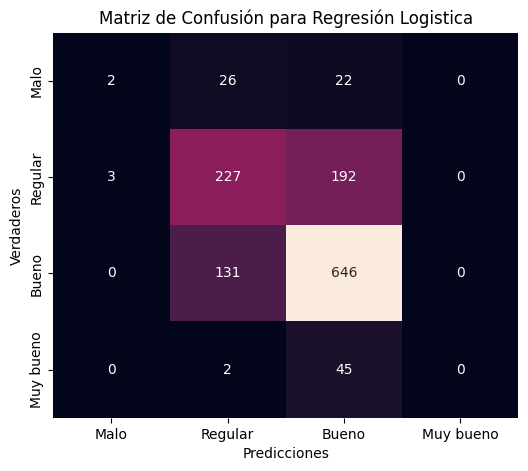

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para Regresión Logistica')
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

resultados = []

resultados_logistic = {
    'Modelo': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

resultados.append(resultados_logistic)

resultados_df = pd.DataFrame(resultados)
resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.675154   0.634879  0.675154  0.646288

#### Decision Tree Classifier

In [46]:
modelo_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

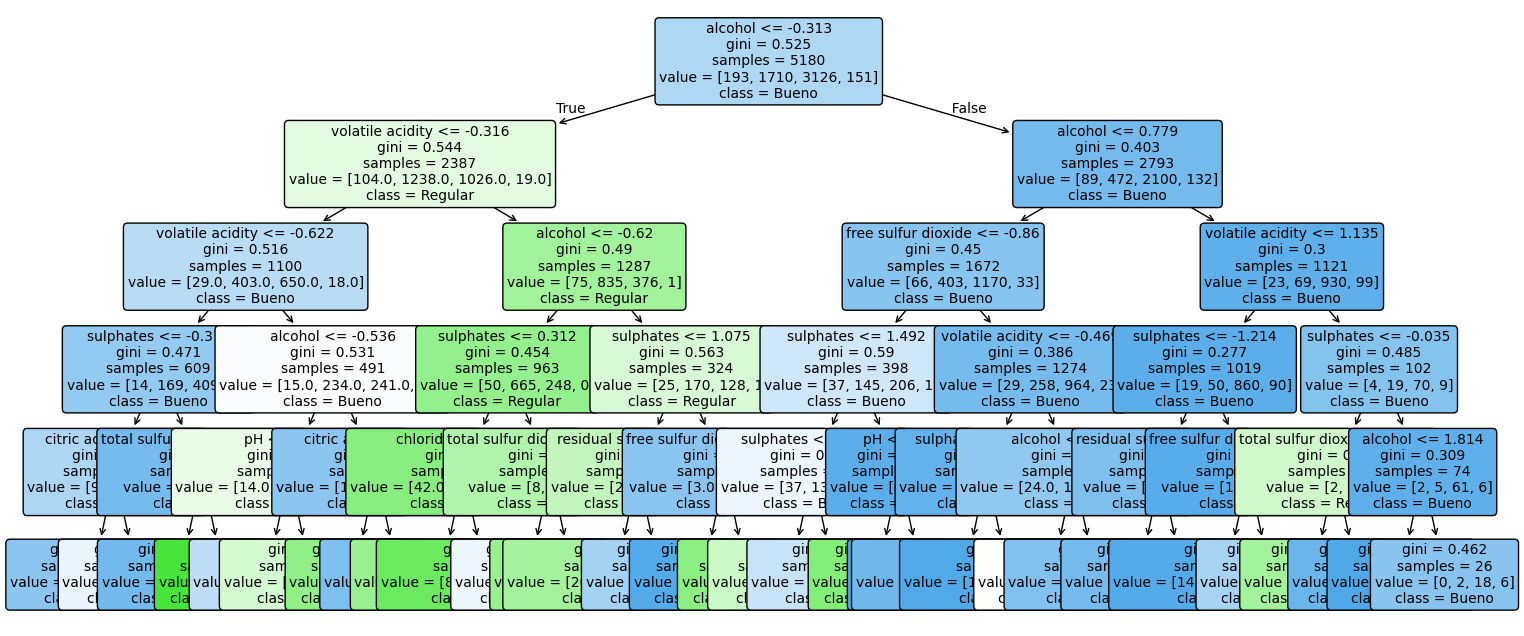

In [47]:
plt.figure(figsize=(18, 8))
plot_tree(
    modelo_dt,                   
    feature_names=X_train.columns,  
    class_names=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
    filled=True,      
    rounded=True,                
    fontsize=10            
)
plt.show()


Aquí se muestra solamente a modo de comprensión las decisiones que toma este modelo sobre la clasificación.

In [48]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']
f1_score_dt = report_dt['weighted avg']['f1-score']

resultados_dt = pd.DataFrame({
    'Modelo': ['Decision Tree'],
    'Accuracy': [accuracy_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'F1-Score': [f1_score_dt]
})

resultados_df = pd.concat([resultados_df, resultados_dt], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.675154   0.634879  0.675154  0.646288
1        Decision Tree  0.685957   0.631407  0.685957  0.657079

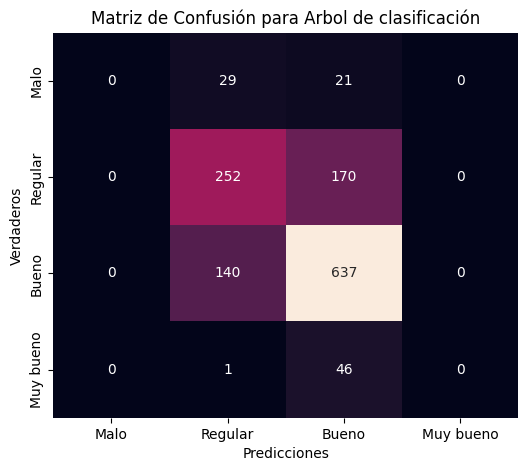

In [49]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para Arbol de clasificación')
plt.show()

#### Random Forest Classifier

In [50]:
modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

In [51]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_score_rf = report_rf['weighted avg']['f1-score']

resultados_rf = pd.DataFrame({
    'Modelo': ['Random Forest Classifier'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1-Score': [f1_score_rf]
})

resultados_df = pd.concat([resultados_df, resultados_rf], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.675154   0.634879  0.675154  0.646288
1             Decision Tree  0.685957   0.631407  0.685957  0.657079
2  Random Forest Classifier  0.750772   0.727734  0.750772  0.721236

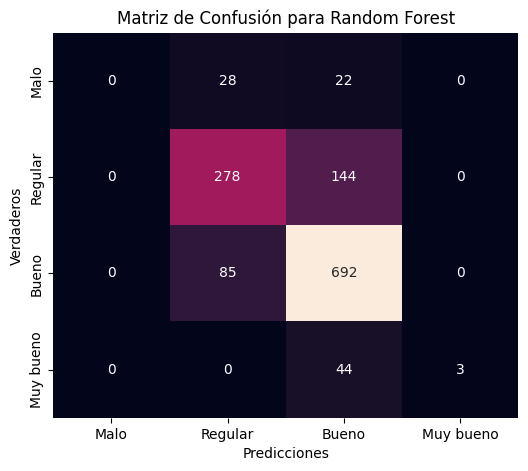

In [52]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para Random Forest')
plt.show()

#### K-nearest Neighbours Classifier

In [53]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)

In [54]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)
precision_knn = report_knn['weighted avg']['precision']
recall_knn = report_knn['weighted avg']['recall']
f1_score_knn = report_knn['weighted avg']['f1-score']

resultados_knn = pd.DataFrame({
    'Modelo': ['K-nearest Neighbors Classifier'],
    'Accuracy': [accuracy_knn],
    'Precision': [precision_knn],
    'Recall': [recall_knn],
    'F1-Score': [f1_score_knn]
})

resultados_df = pd.concat([resultados_df, resultados_knn], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.675154   0.634879  0.675154  0.646288
1                   Decision Tree  0.685957   0.631407  0.685957  0.657079
2        Random Forest Classifier  0.750772   0.727734  0.750772  0.721236
3  K-nearest Neighbors Classifier  0.678241   0.654772  0.678241  0.660330

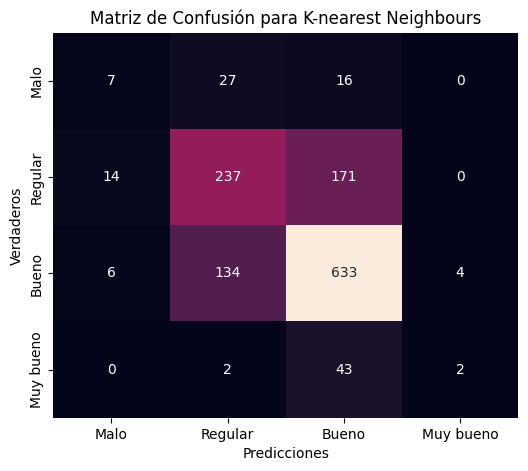

In [55]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para K-nearest Neighbours')
plt.show()

#### Support Vector Classifier

In [56]:
modelo_svc = SVC(kernel='rbf', random_state=42)
modelo_svc.fit(X_train, y_train)
y_pred_svc = modelo_svc.predict(X_test)

In [57]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True, zero_division=0)
precision_svc = report_svc['weighted avg']['precision']
recall_svc = report_svc['weighted avg']['recall']
f1_score_svc = report_svc['weighted avg']['f1-score']

resultados_svc = pd.DataFrame({
    'Modelo': ['Support Vector Classifier'],
    'Accuracy': [accuracy_svc],
    'Precision': [precision_svc],
    'Recall': [recall_svc],
    'F1-Score': [f1_score_svc]
})

resultados_df = pd.concat([resultados_df, resultados_svc], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.675154   0.634879  0.675154  0.646288
1                   Decision Tree  0.685957   0.631407  0.685957  0.657079
2        Random Forest Classifier  0.750772   0.727734  0.750772  0.721236
3  K-nearest Neighbors Classifier  0.678241   0.654772  0.678241  0.660330
4       Support Vector Classifier  0.700617   0.642743  0.700617  0.667423

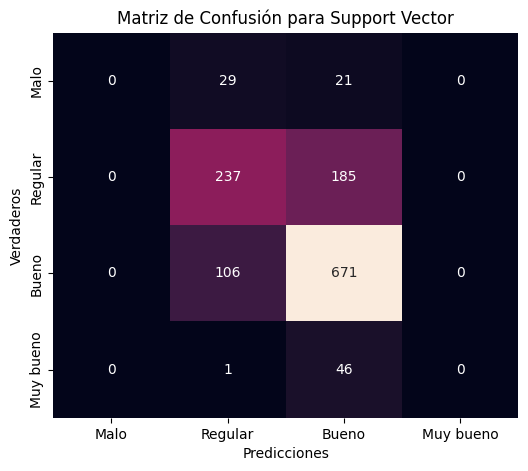

In [58]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para Support Vector')
plt.show()

#### XGBoost

In [59]:
modelo_xgb = XGBClassifier(objective='multi:softmax',n_estimators=200, max_depth=5, learning_rate=0.1, num_class=4, random_state=42)
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)

In [60]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True, zero_division=0)
precision_xgb = report_xgb['weighted avg']['precision']
recall_xgb = report_xgb['weighted avg']['recall']
f1_score_xgb = report_xgb['weighted avg']['f1-score']

resultados_xgb = pd.DataFrame({
    'Modelo': ['XGboost'],
    'Accuracy': [accuracy_xgb],
    'Precision': [precision_xgb],
    'Recall': [recall_xgb],
    'F1-Score': [f1_score_xgb]
})

resultados_df = pd.concat([resultados_df, resultados_xgb], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.675154   0.634879  0.675154  0.646288
1                   Decision Tree  0.685957   0.631407  0.685957  0.657079
2        Random Forest Classifier  0.750772   0.727734  0.750772  0.721236
3  K-nearest Neighbors Classifier  0.678241   0.654772  0.678241  0.660330
4       Support Vector Classifier  0.700617   0.642743  0.700617  0.667423
5                         XGboost  0.742284   0.730708  0.742284  0.727742

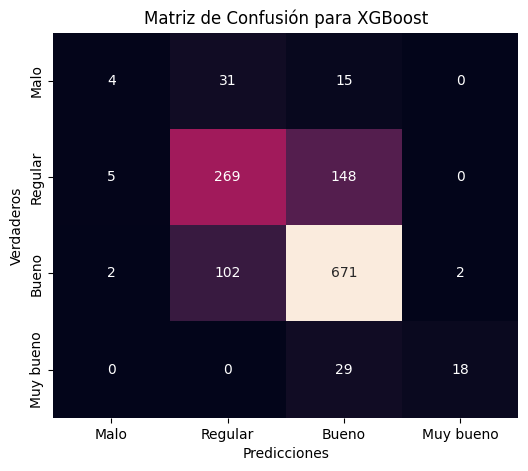

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para XGBoost')
plt.show()

#### LightGBM

In [62]:
modelo_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=4, n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42)
modelo_lgb.fit(X_train, y_train)
y_pred_lgb = modelo_lgb.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 5180, number of used features: 12
[LightGBM] [Info] Start training from score -3.289870
[LightGBM] [Info] Start training from score -1.108312
[LightGBM] [Info] Start training from score -0.505051
[LightGBM] [Info] Start training from score -3.535280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [63]:
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True, zero_division=0)
precision_lgb = report_lgb['weighted avg']['precision']
recall_lgb = report_lgb['weighted avg']['recall']
f1_score_lgb = report_lgb['weighted avg']['f1-score']

resultados_lgb = pd.DataFrame({
    'Modelo': ['LightGBM'],
    'Accuracy': [accuracy_lgb],
    'Precision': [precision_lgb],
    'Recall': [recall_lgb],
    'F1-Score': [f1_score_lgb]
})

resultados_df = pd.concat([resultados_df, resultados_lgb], ignore_index=True)

resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.675154   0.634879  0.675154  0.646288
1                   Decision Tree  0.685957   0.631407  0.685957  0.657079
2        Random Forest Classifier  0.750772   0.727734  0.750772  0.721236
3  K-nearest Neighbors Classifier  0.678241   0.654772  0.678241  0.660330
4       Support Vector Classifier  0.700617   0.642743  0.700617  0.667423
5                         XGboost  0.742284   0.730708  0.742284  0.727742
6                        LightGBM  0.727623   0.733302  0.727623  0.706979

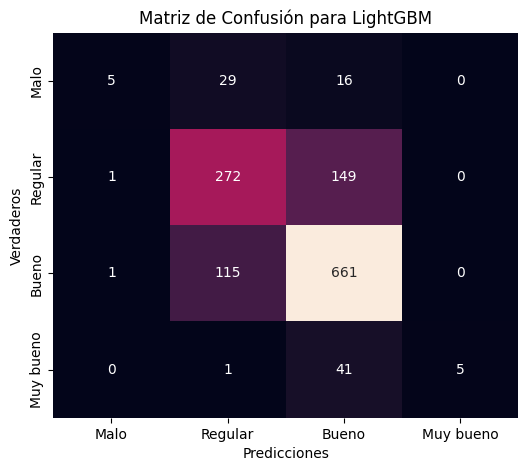

In [64]:
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'], 
            yticklabels=['Malo', 'Regular', 'Bueno', 'Muy bueno'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión para LightGBM')
plt.show()

### Conclusión de las metricas:

In [65]:
resultados_df

Modelo  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.675154   0.634879  0.675154  0.646288
1                   Decision Tree  0.685957   0.631407  0.685957  0.657079
2        Random Forest Classifier  0.750772   0.727734  0.750772  0.721236
3  K-nearest Neighbors Classifier  0.678241   0.654772  0.678241  0.660330
4       Support Vector Classifier  0.700617   0.642743  0.700617  0.667423
5                         XGboost  0.742284   0.730708  0.742284  0.727742
6                        LightGBM  0.727623   0.733302  0.727623  0.706979

**Evaluación de Métricas:**
- Accuracy: Indica la proporción de clasificaciones correctas entre todas las predicciones.
- Precision: Es la proporción de predicciones correctas en relación con todas las instancias predichas como una clase en particular.
- Recall: Mide la proporción de predicciones correctas de una clase en relación con todas las instancias reales de esa clase.
- F1-Score: Ofrece una visión equilibrada entre la precision y el recall y es especialmente útil cuando hay un desbalance en las clases.

Considero que F1-Score es la métrica más importante, ya necesito minimizar los falsos positivos (Precision) y los falsos negativos (Recall).

Basandonos en los resultados, el Random Forest Classifier y el modelo XGBoost tienen el F1-Score más alto, lo cual sugiere que son los mejores modelos para este objetivo de clasificación.  

---------------------------------------

### Conclusión final:
En este proyecto, se analizaron las propiedades químicas de los vinos y su relación con la calidad para construir un modelo predictivo que clasifique los vinos en distintas categorías de calidad. El proceso comenzó con un análisis exploratorio de datos (EDA), que incluyó la visualización y limpieza de datos. Esto permitió evaluar cada hipótesis planteada sobre la influencia de diferentes factores químicos en la calidad del vino.

Luego, se prepararon y procesaron los datos para el entrenamiento de distintos modelos de clasificación, asegurando que los datos estén en condiciones óptimas para el modelado. Se evaluaron múltiples modelos de clasificación, y para cada uno se calcularon métricas de rendimiento (accuracy, precisión, recall, F1-Score). Los resultados indican que <u>**Random Forest Classifier**</u> y <u>**XGBoost**</u> fueron los modelos con el mejor desempeño en la clasificación de la calidad del vino.

Si bien las métricas de rendimiento de los modelos no fueron las mejores, ya que la más alta fue <u>**F1-Score: 0.727742**</u>, se podría intentar mejorar. Algunas de las posibles mejoras son:  
- <u>Ajuste de hiperparámetros:</u> La optimización de hiperparámetros mediante una búsqueda con `GridSearchCV`, especialmente en modelos como Random Forest y XGBoost, podría mejorar la precisión y reducir los falsos positivos y negativos. En esta mejora de hiperparametros, también se podría incluir la aplicación de validación cruzada (Cross-Validation) y analizar cmo cambian las métricas.
- <u>Feature selection:</u> Se podría bajar el umbral de correlación y eliminar variables menos relevantes o redundantes para ayudar a reducir el ruido en el modelo.
- <u>Transformaciones alternativas:</u> En lugar de StandardScaler, probar otras técnicas de escalado o normalización de datos podría ofrecer resultados distintos y posiblemente mejorar la clasificación.